In [51]:
import numpy as np 
import pandas as pd
import tensorflow as tf
import os
import random
from PIL import Image 
import matplotlib.pyplot as plt

In [53]:
image_dir  = '/Users/z88756212/Documents/AI/python/Garbage classification/Garbage classification/Garbage classification'

classes = os.listdir(image_dir)
selected_category = random.choice(classes)
category_path = os.path.join(image_dir, selected_category)

images = os.listdir(category_path)
selected_image = random.choice(images)
image_path = os.path.join(category_path, selected_image)

print(f"隨機選擇的類別：{selected_category}")
print(f"隨機選擇的圖片：{selected_image}")
print(f"圖片路徑：{image_path}")

image = Image.open(image_path)
image.show()

隨機選擇的類別：paper
隨機選擇的圖片：paper342.jpg
圖片路徑：/Users/z88756212/Documents/AI/python/Garbage classification/Garbage classification/Garbage classification/paper/paper342.jpg


準備數據集

In [56]:
def parse_annotation_file(file_path):
    annotations = []
    with open(file_path, 'r') as f:
        for line in f:
            if line.strip():
                parts = line.strip().split()  
                file_name = parts[0]         
                class_id = int(parts[1])-1    
                annotations.append({'file_name': file_name, 'class_id': class_id})
    return pd.DataFrame(annotations)
    

train_df = parse_annotation_file('one-indexed-files-notrash_train.txt')

#train_df['class_id'] = train_df['class_id'].astype(str)

print(train_df.head())

          file_name  class_id
0  cardboard202.jpg         2
1      paper472.jpg         1
2      paper522.jpg         1
3      glass189.jpg         0
4      glass325.jpg         0


In [58]:
def parse_annotation_file(file_path):
    annotations = []
    with open(file_path, 'r') as f:
        for line in f:
            if line.strip():
                parts = line.strip().split() 
                file_name = parts[0]       
                class_id = int(parts[1])-1    
                annotations.append({'file_name': file_name, 'class_id': class_id})
    return pd.DataFrame(annotations)
    

val_df = parse_annotation_file('one-indexed-files-notrash_val.txt')

#val_df['class_id'] = val_df['class_id'].astype(str)

print(val_df.head())

          file_name  class_id
0  cardboard114.jpg         2
1    plastic204.jpg         3
2      glass123.jpg         0
3      glass152.jpg         0
4      glass398.jpg         0


In [60]:
def parse_annotation_file(file_path):
    annotations = []
    with open(file_path, 'r') as f:
        for line in f:
            # 忽略空行
            if line.strip():
                parts = line.strip().split()  # 分割成檔案名稱和類別 ID
                file_name = parts[0]         # 圖片名稱
                class_id = int(parts[1])-1   # 類別 ID
                annotations.append({'file_name': file_name, 'class_id': class_id})
    return pd.DataFrame(annotations)
    

test_df = parse_annotation_file('one-indexed-files-notrash_test.txt')

#test_df['class_id'] = test_df['class_id'].astype(str)

print(test_df.head())

         file_name  class_id
0      paper70.jpg         1
1     paper380.jpg         1
2  cardboard31.jpg         2
3      glass12.jpg         0
4     paper169.jpg         1


In [62]:
len(train_df),len(val_df),len(test_df)

(1768, 328, 431)

資料擴增

In [65]:
image_dir = '/Users/z88756212/Documents/AI/python/Garbage classification/Garbage classification/Garbage classification'

class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

train_df['file_path'] = train_df.apply(
    lambda x: os.path.join(image_dir, class_names[x['class_id']], x['file_name']), axis=1
)

print(train_df.head())

          file_name  class_id  \
0  cardboard202.jpg         2   
1      paper472.jpg         1   
2      paper522.jpg         1   
3      glass189.jpg         0   
4      glass325.jpg         0   

                                           file_path  
0  /Users/z88756212/Documents/AI/python/Garbage c...  
1  /Users/z88756212/Documents/AI/python/Garbage c...  
2  /Users/z88756212/Documents/AI/python/Garbage c...  
3  /Users/z88756212/Documents/AI/python/Garbage c...  
4  /Users/z88756212/Documents/AI/python/Garbage c...  


In [67]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

IMG_SIZE = (224, 224)
BATCH_SIZE = 32
image_dir = 'path_to_images' 

train_datagen = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range= 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

valid_datagen = ImageDataGenerator(rescale=1.0/255)

train_df['class_id'] = train_df['class_id'].astype(str)
val_df['class_id'] = val_df['class_id'].astype(str)


train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='file_name',
    y_col='class_id',  
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_dataframe(
    val_df,
    x_col='file_name',
    y_col='class_id', 
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    shuffle=False
)

print(train_generator.class_indices)

Found 0 validated image filenames belonging to 0 classes.
Found 0 validated image filenames belonging to 0 classes.
{}


/Users/z88756212/anaconda3/lib/python3.10/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 1768 invalid image filename(s) in x_col="file_name". These filename(s) will be ignored.
  warnings.warn(
/Users/z88756212/anaconda3/lib/python3.10/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 328 invalid image filename(s) in x_col="file_name". These filename(s) will be ignored.
  warnings.warn(


In [69]:
import os

for i in range(5):
    img_path = train_df['file_path'][i]
    print(f"Checking: {img_path}, Exists: {os.path.exists(img_path)}")

Checking: /Users/z88756212/Documents/AI/python/Garbage classification/Garbage classification/Garbage classification/metal/cardboard202.jpg, Exists: False
Checking: /Users/z88756212/Documents/AI/python/Garbage classification/Garbage classification/Garbage classification/glass/paper472.jpg, Exists: False
Checking: /Users/z88756212/Documents/AI/python/Garbage classification/Garbage classification/Garbage classification/glass/paper522.jpg, Exists: False
Checking: /Users/z88756212/Documents/AI/python/Garbage classification/Garbage classification/Garbage classification/cardboard/glass189.jpg, Exists: False
Checking: /Users/z88756212/Documents/AI/python/Garbage classification/Garbage classification/Garbage classification/cardboard/glass325.jpg, Exists: False


改用 DataLoader

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: metal (Class No.2)
Training set size: 1768
Validation set size: 379
Test set size: 380


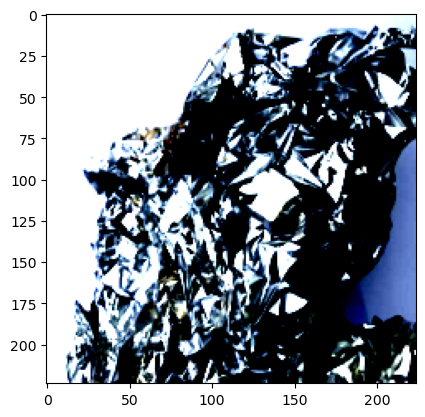

In [72]:
from torch.utils.data import DataLoader , random_split
from torchvision import transforms , datasets

image_dir  = '/Users/z88756212/Documents/AI/python/Garbage classification/Garbage classification/Garbage classification'


transform = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(),  
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ResNet50 用的均值和標準差
])

dataset = datasets.ImageFolder(image_dir,transform=transform)

train_size = int(0.7 * len(dataset))  
val_size = int(0.15 * len(dataset))  
test_size = len(dataset) - train_size - val_size 

train_ds, val_ds, test_ds = random_split(dataset, [train_size, val_size, test_size])

train_dl = DataLoader(train_ds, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)
test_dl = DataLoader(test_ds, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

def show_sample(img, label):
    print("Label:", dataset.classes[label], "(Class No."+ str(label) + ")")
    plt.imshow(img.permute(1, 2, 0)) 

img, label = train_ds[12] 
show_sample(img, label)

print(f"Training set size: {len(train_ds)}")
print(f"Validation set size: {len(val_ds)}")
print(f"Test set size: {len(test_ds)}")


訓練模型

In [75]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models

model = models.resnet50(pretrained=True)

num_classes = len(dataset.classes)
model.fc = nn.Linear(model.fc.in_features,num_classes)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

/Users/z88756212/anaconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/z88756212/anaconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [77]:
# 設定損失函數、優化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # 使用 Adam 優化器

In [79]:
# 訓練模型
# 初始化空列表
train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []

num_epochs = 20 

for epoch in range(num_epochs):
    model.train() 
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_dl:
        images, labels = images.to(device), labels.to(device)
        
        # 前向傳播
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # 反向傳播和優化
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        # 計算準確率
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    # 計算每個 epoch 的損失和準確率
    train_loss = running_loss / len(train_dl)
    train_acc = correct / total
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    
    # 在驗證集上評估模型
    model.eval()  # 設置模型為評估模式
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():  # 禁用梯度計算
        for images, labels in val_dl:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    # 計算驗證集上的損失和準確率
    val_loss /= len(val_dl)
    val_acc = correct / total
    val_loss_list.append(val_loss)
    val_acc_list.append(val_acc)
    
    # 輸出訓練和驗證的損失與準確率
    print(f"Epoch [{epoch+1}/{num_epochs}], "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
          f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")

        

Epoch [1/20], Train Loss: 1.1390, Train Acc: 0.5905, Val Loss: 1.5739, Val Acc: 0.5805
Epoch [2/20], Train Loss: 0.8732, Train Acc: 0.6951, Val Loss: 1.0595, Val Acc: 0.5937
Epoch [3/20], Train Loss: 0.6672, Train Acc: 0.7545, Val Loss: 0.8426, Val Acc: 0.6966
Epoch [4/20], Train Loss: 0.6250, Train Acc: 0.7817, Val Loss: 1.2374, Val Acc: 0.6570
Epoch [5/20], Train Loss: 0.5708, Train Acc: 0.7947, Val Loss: 1.2125, Val Acc: 0.6201
Epoch [6/20], Train Loss: 0.5446, Train Acc: 0.8201, Val Loss: 1.3191, Val Acc: 0.6095
Epoch [7/20], Train Loss: 0.5097, Train Acc: 0.8218, Val Loss: 1.1498, Val Acc: 0.6306
Epoch [8/20], Train Loss: 0.3562, Train Acc: 0.8778, Val Loss: 0.7408, Val Acc: 0.7652
Epoch [9/20], Train Loss: 0.3446, Train Acc: 0.8903, Val Loss: 0.8453, Val Acc: 0.7361
Epoch [10/20], Train Loss: 0.3479, Train Acc: 0.9010, Val Loss: 0.8697, Val Acc: 0.7282
Epoch [11/20], Train Loss: 0.3269, Train Acc: 0.8897, Val Loss: 0.9230, Val Acc: 0.7282
Epoch [12/20], Train Loss: 0.2046, Train 

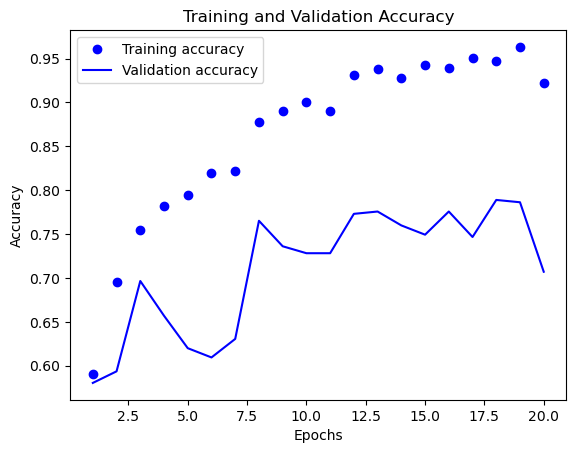

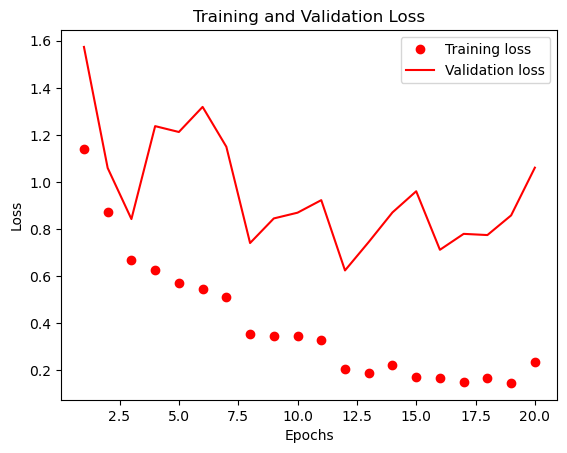

In [80]:
import matplotlib.pyplot as plt


# 設定 epochs 軸
epochs = range(1, num_epochs + 1)

# 繪製準確率曲線
plt.plot(epochs, train_acc_list, "bo", label="Training accuracy")
plt.plot(epochs, val_acc_list, "b", label="Validation accuracy")
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

# 繪製損失曲線
plt.plot(epochs, train_loss_list, "ro", label="Training loss")
plt.plot(epochs, val_loss_list, "r", label="Validation loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()


In [81]:
# 7. 在測試集上評估模型
model.eval()  # 設置模型為評估模式
test_loss = 0.0
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_dl:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        test_loss += loss.item()
        
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_loss /= len(test_dl)
test_acc = correct / total

print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")


Test Loss: 0.9832, Test Accuracy: 0.7342


In [82]:
# 保存模型
torch.save(model.state_dict(), 'garbage_classification_resnet50.pth')

# 載入模型
model.load_state_dict(torch.load('garbage_classification_resnet50.pth'))

<All keys matched successfully>

第二次修改

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Label: paper (Class No.3)


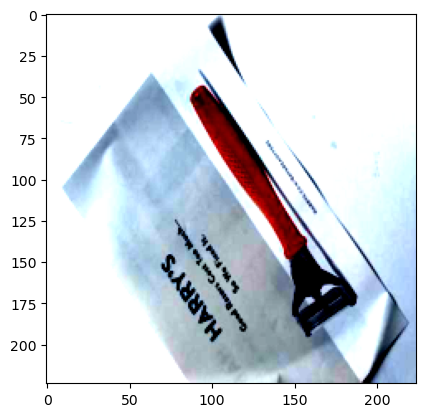

In [87]:
from torch.utils.data import DataLoader , random_split
from torchvision import transforms , datasets

image_dir  = '/Users/z88756212/Documents/AI/python/Garbage classification/Garbage classification/Garbage classification'


transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 調整圖像大小
    transforms.ToTensor(),  # 轉換為 Tensor 並歸一化到 [0, 1]
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ResNet50 用的均值和標準差
])

dataset = datasets.ImageFolder(image_dir,transform=transform)

train_size = int(0.7 * len(dataset))  
val_size = int(0.15 * len(dataset))  
test_size = len(dataset) - train_size - val_size 

train_ds, val_ds, test_ds = random_split(dataset, [train_size, val_size, test_size])

train_dl = DataLoader(train_ds, batch_size=32, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)
test_dl = DataLoader(test_ds, batch_size=32, shuffle=False, num_workers=4, pin_memory=True)

# 顯示一個訓練集的範例圖片
def show_sample(img, label):
    print("Label:", dataset.classes[label], "(Class No."+ str(label) + ")")
    plt.imshow(img.permute(1, 2, 0)) 

img, label = train_ds[12] 
show_sample(img, label)

In [89]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models


model = models.resnet50(pretrained=True)

num_classes = len(dataset.classes)
model.fc = nn.Sequential(
    nn.Dropout(0.5),  # Dropout 機率為 0.5
    nn.Linear(model.fc.in_features, num_classes)
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

/Users/z88756212/anaconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/z88756212/anaconda3/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [91]:
# 設定損失函數、優化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001) 

In [93]:
# 訓練模型
# 初始化空列表
train_loss_list = []
train_acc_list = []
val_loss_list = []
val_acc_list = []

scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5) 


num_epochs = 20  

for epoch in range(num_epochs):
    model.train()  
    scheduler.step()
    running_loss = 0.0
    correct = 0
    total = 0
    
    for images, labels in train_dl:
        images, labels = images.to(device), labels.to(device)
        
        # 前向傳播
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # 反向傳播和優化
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        # 計算準確率
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
    # 計算每個 epoch 的損失和準確率
    train_loss = running_loss / len(train_dl)
    train_acc = correct / total
    train_loss_list.append(train_loss)
    train_acc_list.append(train_acc)
    
    # 在驗證集上評估模型
    model.eval()  # 設置模型為評估模式
    val_loss = 0.0
    correct = 0
    total = 0
    with torch.no_grad():  # 禁用梯度計算
        for images, labels in val_dl:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
            
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
        # 計算驗證集上的損失和準確率
        val_loss /= len(val_dl)
        val_acc = correct / total
        val_loss_list.append(val_loss)
        val_acc_list.append(val_acc)
        
        # 輸出訓練和驗證的損失與準確率
        print(f"Epoch [{epoch+1}/{num_epochs}], "
              f"Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.4f}, "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}")
        

/Users/z88756212/anaconda3/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:143: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


Epoch [1/20], Train Loss: 1.1847, Train Acc: 0.6069, Val Loss: 0.9671, Val Acc: 0.6438
Epoch [2/20], Train Loss: 0.8384, Train Acc: 0.6867, Val Loss: 1.0679, Val Acc: 0.6755
Epoch [3/20], Train Loss: 0.6716, Train Acc: 0.7540, Val Loss: 0.9619, Val Acc: 0.6992


KeyboardInterrupt: 